In [1]:
import pandas as pd

df=pd.read_csv('dataset10.tsv', sep='\t',header=0)
df.columns= ['subject', 'predicate', 'object']
df

,subject,predicate,object
0,Bob,like,movie
1,Charlie,like,movie
2,David,like,music
3,Eve,like,music
4,Alice,has,cat
5,Bob,has,cat
6,David,has,dog
7,Eve,has,dog
8,Frank,has,dog
9,David,has,cat


In [2]:

from pykeen.triples import TriplesFactory

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)
triples_factory.triples

/home/wasit/miniconda3/envs/pykeen-tutorials/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Reconstructing all label-based triples. This is expensive and rarely needed.


array([['Alice', 'has', 'cat'],
       ['Bob', 'has', 'cat'],
       ['Bob', 'like', 'movie'],
       ['Charlie', 'like', 'movie'],
       ['David', 'has', 'cat'],
       ['David', 'has', 'dog'],
       ['David', 'like', 'music'],
       ['Eve', 'has', 'dog'],
       ['Eve', 'like', 'music'],
       ['Frank', 'has', 'dog']], dtype='<U7')

No random seed is specified. Setting to 1764386748.
No cuda devices were available. The model runs on CPU
Training epochs on cpu: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.90epoch/s, loss=0.242, prev_loss=0.223]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10.0/10.0 [00:00<00:00, 343triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.03s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be

Hits@1: 0.95
Hits@3: 1.0
Hits@5: 1.0
Hits@10: 1.0
Mean Reciprocal Rank: 0.9750000238418579


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

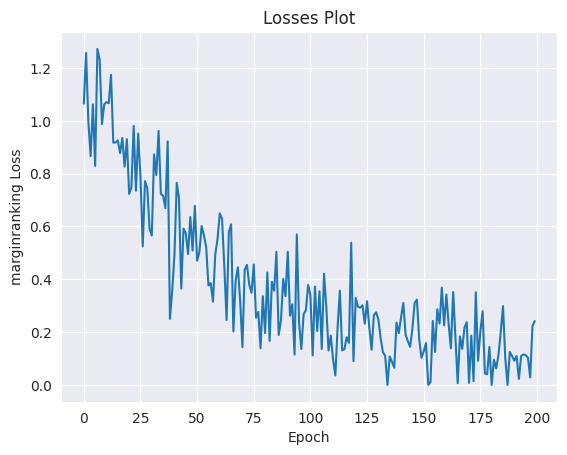

In [3]:
from pykeen.pipeline import pipeline
training = triples_factory
validation = triples_factory
testing = triples_factory

result = pipeline(
    model='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=3),  # Increase the embedding dimension
    optimizer_kwargs=dict(lr=0.01),  # Adjust the learning rate
    training_kwargs=dict(num_epochs=200, use_tqdm_batch=False),  # Increase the number of epochs
)

# The trained model is stored in the pipeline result
model = result.model

from pykeen.evaluation import RankBasedEvaluator

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()

In [4]:
from pykeen.evaluation import RankBasedEvaluator
# The result object also contains the evaluation metrics result.metric_results.to_df()

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10.0/10.0 [00:00<00:00, 273triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


Hits@1: 0.95
Hits@3: 1.0
Hits@5: 1.0
Hits@10: 1.0
Mean Reciprocal Rank: 0.9750000238418579
